In [44]:
import random
from shutil import copyfile
import cv2
import os
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import facemaskmaker
import time
import importlib
import jupiter_utils
import pickle

In [45]:
mask_image_paths = jupiter_utils.get_paths_of_files_by_extension('../datasets/mask_images')
face_image_paths = jupiter_utils.get_paths_of_files_by_extension('../datasets/ds2_face_recognition_dataset/lfw_funneled', 'jpg')

print(f'Mask images: {len(mask_image_paths)}')
print(f'Face images: {len(face_image_paths)}')

Mask images: 9
Face images: 13233


In [46]:
out_folder_path = os.path.abspath('../datasets/ds5_fake_face_mask')
jupiter_utils.create_folder(out_folder_path)
with_mask_folder_path = os.path.join(out_folder_path, 'with_mask')
jupiter_utils.create_folder(with_mask_folder_path)
without_mask_folder_path = os.path.join(out_folder_path, 'without_mask')
jupiter_utils.create_folder(without_mask_folder_path)

In [47]:
with_mask_paths = random.sample(face_image_paths, int(len(face_image_paths) / 2))
without_mask_paths = [path for path in face_image_paths if path not in with_mask_paths]
print(f'With mask face images: {len(with_mask_paths)}')
print(f'Without mask face images: {len(without_mask_paths)}')

With mask face images: 6616
Without mask face images: 6617


In [48]:
print('Start of coping files with faces without mask...')
for (i, file_path) in enumerate(without_mask_paths):
    file_name = file_path.split(os.sep)[-1]
    new_file_path = os.path.join(without_mask_folder_path, file_name)
    copyfile(file_path, new_file_path)
    if (i+1) % (len(without_mask_paths) // 10) == 0 and i != 0:
        print(f'{int((i+1)/len(without_mask_paths)*100)+1}% of files were copied...')
print('Process was finished successfully')

Start of coping files with faces without mask...
10% of files were copied...
20% of files were copied...
30% of files were copied...
40% of files were copied...
50% of files were copied...
60% of files were copied...
70% of files were copied...
80% of files were copied...
90% of files were copied...
100% of files were copied...
Process was finished successfully


In [49]:
print('Start of processing files of faces with mask...')
start_time = time.time()

mask_images = []
for image_path in mask_image_paths:
    mask_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    mask_images.append(mask_image)
mask_images_stack = mask_images.copy()

def get_mask_image():
    global mask_images_stack
    global mask_images
    if mask_images_stack:
        return mask_images_stack.pop()
    mask_images_stack = random.sample(mask_images, len(mask_images))
    return get_mask_image()

face_mask_maker = facemaskmaker.FaceMaskMaker({})
problem_file_paths = []

for (i, file_path) in enumerate(with_mask_paths):
    file_name = file_path.split(os.sep)[-1]
    try:
        face_image = cv2.imread(file_path)
        mask_image = get_mask_image()
        result_image = face_mask_maker.add_face_mask(face_image, mask_image)
        result_image_path = os.path.join(with_mask_folder_path, file_name)
        cv2.imwrite(result_image_path, result_image)
    except:
        print(f'Something went wrong during processing {file_name}')
        problem_file_paths.append(file_path)
    finally:
        if (i+1) % (len(without_mask_paths) // 10) == 0 and i != 0:
            execution_time = int(time.time() - start_time)
            print(f'Execution time: {execution_time} second. {int((i+1)/len(without_mask_paths)*100)+1}% of files were processed...')

if problem_file_paths:
    print(f'Process was finished with errors: {len(problem_file_paths)}.')
else:
    print(f'Process was finished successfully.')
print(f'Execution time {int(time.time() - start_time)}')

Start of processing files of faces with mask...
Something went wrong during processing Charles_Moose_0010.jpg
Something went wrong during processing Colin_Powell_0068.jpg
Something went wrong during processing George_W_Bush_0442.jpg
Something went wrong during processing Jason_Kidd_0009.jpg
Something went wrong during processing Habib_Rizieq_0005.jpg
Something went wrong during processing Nestor_Kirchner_0034.jpg
Something went wrong during processing George_W_Bush_0504.jpg
Something went wrong during processing Vladimir_Putin_0040.jpg
Something went wrong during processing Megawati_Sukarnoputri_0003.jpg
Execution time: 13 second. 10% of files were processed...
Something went wrong during processing Mohammad_Khatami_0008.jpg
Something went wrong during processing Felipe_Perez_Roque_0003.jpg
Something went wrong during processing Jose_Maria_Aznar_0012.jpg
Something went wrong during processing David_Hyde_Pierce_0002.jpg
Something went wrong during processing Lea_Fastow_0001.jpg
Somethin

In [6]:
problem_file_paths = pickle.load(open('problem_file_paths.p', 'rb'))
mask_images = []
for image_path in mask_image_paths:
    mask_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    mask_images.append(mask_image)

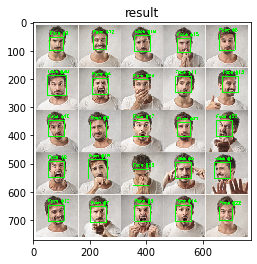

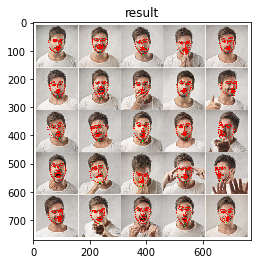

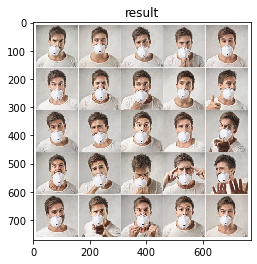

True

In [79]:
importlib.reload(facemaskmaker)

face_mask_maker = facemaskmaker.FaceMaskMaker({})
problem_file_path = r"C:\DevEnv\Workspaces\facemask-maker\datasets\ds6_favorite_images\example-3.jpg"
mask_image = mask_images[0]
image = cv2.imread(problem_file_path)
rectangles, out_image = face_mask_maker.get_face_rectangles_by_cnn_dlib(image, True)
jupiter_utils.print_image(out_image)
shapes, out_image = face_mask_maker.get_shape68_by_dlib(image, rectangles, True)
# shapes = [shapes[-2]]
jupiter_utils.print_image(out_image)
out_image = face_mask_maker.add_face_mask_by_shapes(image, mask_image, shapes)
jupiter_utils.print_image(out_image)
cv2.imwrite('out.jpg', out_image)
# result_image = face_mask_maker.add_face_mask(image, mask_image)
# jupiter_utils.print_image(result_image)